# R. Sri Vigneshwar Capstone Project: Insurance Premiums

Problem statement: To help understand the interplay of various attributes of the insured and see how they affect the insurance premium

# Stage 1: Data exploration and cleaning

In [1]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('pinsurance.csv')

In [3]:
#To check the file got imported properly
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
#Observe for missing values in the data set
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
# Better understanding of the data
df.describe()
df.index
df.dtypes
df.shape

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


RangeIndex(start=0, stop=1338, step=1)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

(1338, 7)

In [6]:
#Check for duplicates
df.duplicated().sum()


1

In [7]:
#Remove duplicates
df.drop_duplicates()
df = df.drop_duplicates()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [8]:
targets = df.expenses 
targets.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [10]:
# There are multiple variables, the relationship between them and the target should be explored. 
# Moreover the variable themselves could have a relationship between themselves. 
# Exploratory Data analysis should be utilised.
from matplotlib import pyplot as plt
import seaborn as sns

# Stage 2: Exploratory Data Analysis

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


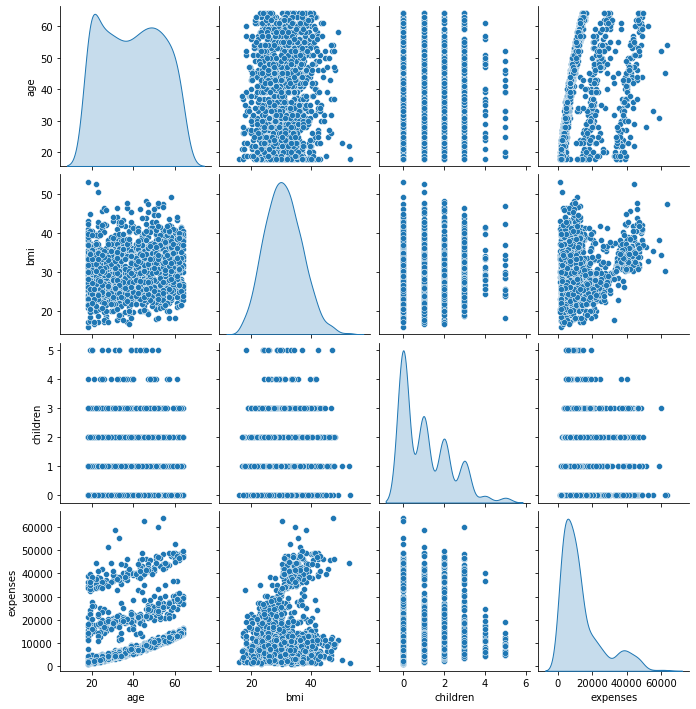

In [11]:
#The variables Age, BMI, children and expenses are numeric data
#The variables Sex, Smoker and region(multiple categories) are categorical data.
#Check relations between the numeric data
df.corr()
sns.pairplot(df,diag_kind='kde')

Age seems to be positively correlated with expenses
While Children seems to be negatively correlated with expenses
BMI seems to be positively correlated with expenses too
We should check the categorical variables with the other variables


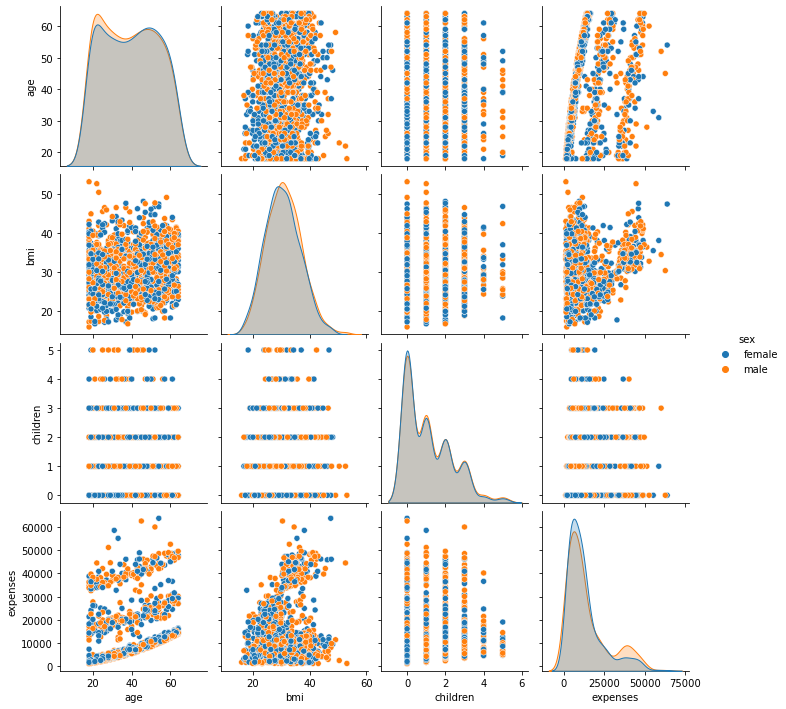

In [12]:
sns.pairplot(data=df,hue='sex')

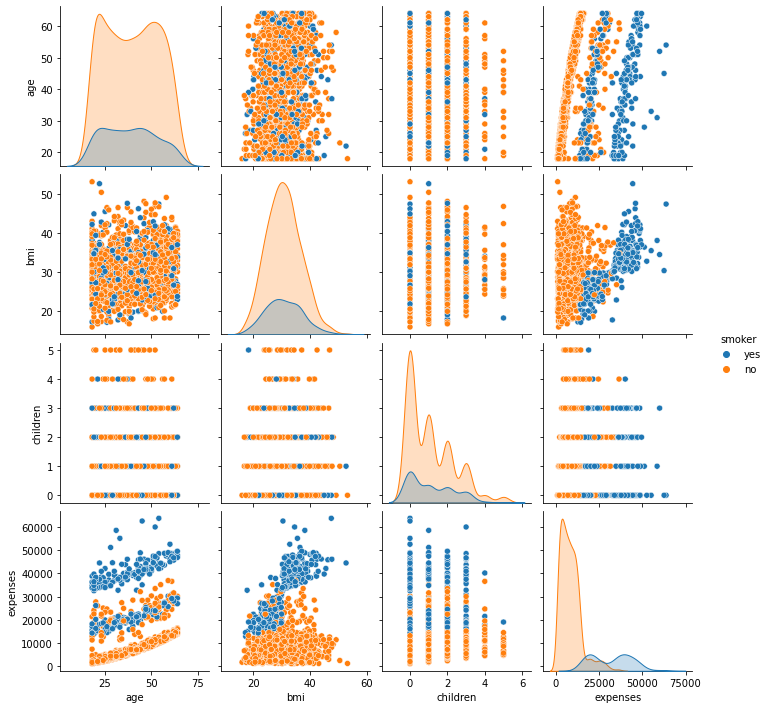

In [13]:
sns.pairplot(data=df,hue='smoker')

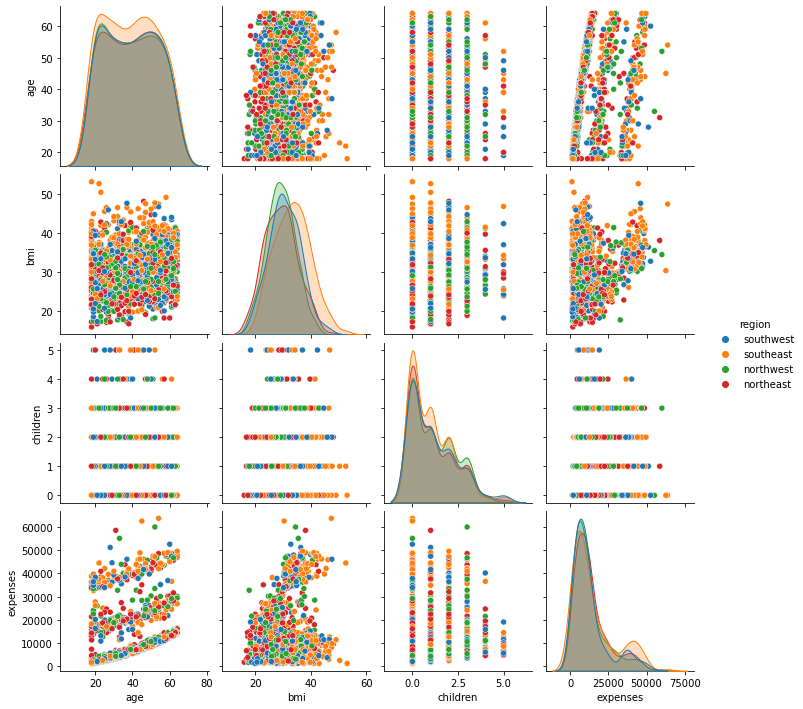

In [14]:
sns.pairplot(data=df,hue='region')

The data plots above show that gender and region barely have any discernable patterns with expenses.
However whether an individual smokes seems to have clear pattern with expenses.

In [15]:
df.smoker.replace({"no":0,"yes":1}, inplace=True)

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86


In [17]:
df.corr()

,age,bmi,children,smoker,expenses
age,1.000000,0.109414,0.041536,-0.025587,0.298308
bmi,0.109414,1.000000,0.012641,0.003964,0.198637
children,0.041536,0.012641,1.000000,0.007331,0.067389
smoker,-0.025587,0.003964,0.007331,1.000000,0.787234
expenses,0.298308,0.198637,0.067389,0.787234,1.000000


The correlation data shows that whether an individual smokes has a strong correlation with expenses.

# Stage 3: Model construction

In [18]:
features = ["age","smoker","bmi","children"]

#Import the library
from sklearn.linear_model import LinearRegression
X = df[["age","smoker","bmi","children"]]
y = df.expenses

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df[["age","smoker","bmi","children","expenses"]])
df[["age","smoker","bmi","children","expenses"]] = ss.transform(df[["age","smoker","bmi","children","expenses"]])

#Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.2, random_state=99)

#create an instance of model
lm = LinearRegression()

#fit the variables into the model
lm.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#use the model to predict your dependent variables
predictions = lm.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("MSE:", mse)
print("R-squared:", r2)

adj_r2 = 1 - (len(y)-1)/(len(y)-len(X.columns)-1)*(1 - r2)
print("Adjusted R-squared:", adj_r2)

    
print("Coefficients: ",lm.coef_)
print("Intercept: ",lm.intercept_)

StandardScaler()

LinearRegression()

MSE: 34686334.97121945
R-squared: 0.7317345503605488
Adjusted R-squared: 0.7309289484096795
Coefficients:  [  262.26146549 23878.47370359   339.68441758   534.45735774]
Intercept:  -12883.43240084326


In [19]:
lm.score(X_test,y_test)

0.7317345503605488

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, "Predicted expenses from ['age' 'smoker' 'bmi' 'children']")

Text(0, 0.5, 'Actual expenses')

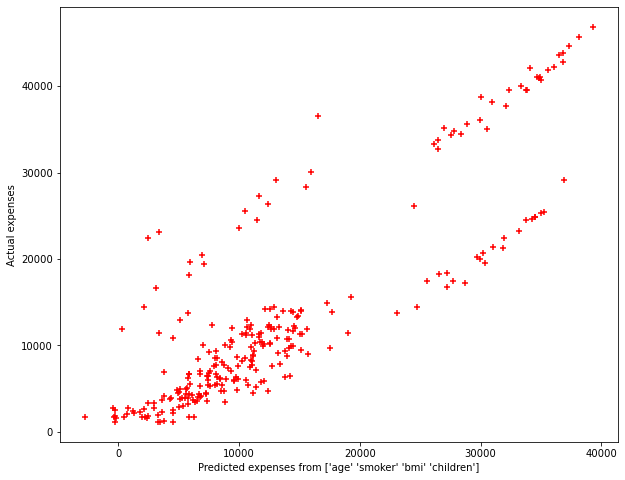

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+')
plt.xlabel(f"Predicted expenses from {X.columns.values}")
plt.ylabel("Actual expenses")

Conclusion

While an individual's age, smoking habits, BMI and the number of children they have play a fundamental roles in accounting for the expenses incurred from the insurance premiums, there is still a variable that has not been identified that could increase the model's accuracy. 

Improvements to consider
1. More data points could be very useful in elucidating the relationships of the variables to the expenses
2. Several insurance premiums are predicated on variables like pre-existing conditions (MOH). Perhaps considering this kind of data might help address the model's accuracy 

References

Linear Regressions and Split Datasets Using Sklearn

https://medium.com/the-code-monster/split-a-dataset-into-train-and-test-datasets-using-sk-learn-acc7fd1802e0

https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/

(MOH)
https://www.moh.gov.sg/home/our-healthcare-system/medishield-life/what-is-medishield-life/coverage-for-pre-existing-conditions
